## Gurobi example

In [13]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP, ModelOptions


In [ ]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

In [14]:
ModelOptions.help()

topology in {"radial", "branched", "branched"} default: branched
    Set the topology of subtrees in the solution.

feeder_route in {"straight", "segmented", "segmented"} default: segmented
    If feeder routes must be "straight" or can be detoured ("segmented").

feeder_limit in {"unlimited", "specified", "minimum", "min_plus1", "min_plus2", "min_plus3", "unlimited"} default: unlimited
    Whether to limit the maximum number of feeders, if set to "specified", additional kwarg "max_feeders" must be given.



### Initialize Gwynt y Mor

In [15]:
file_path =  '../../optiwindnet/data/Gwynt y Mor.yaml'
wfn = WindFarmNetwork.from_yaml(filepath=file_path, cables=7)

<Axes: >

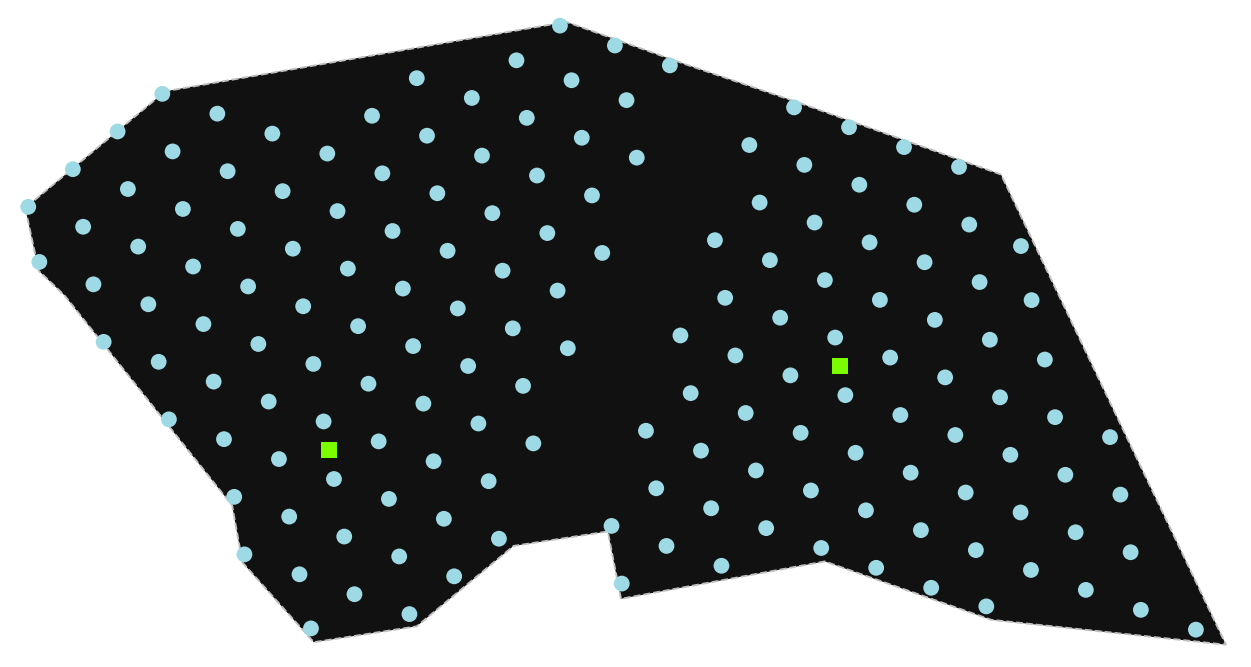

In [ ]:
wfn.plot_location()

### Optimize Gwynt y Mor

<Axes: >

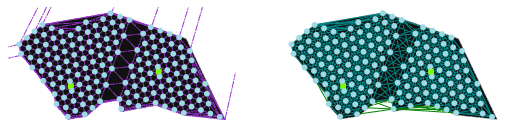

In [17]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['svg.fonttype'] = 'none'
fig, (ax1, ax2) = plt.subplots(1, 2, facecolor='none', figsize=(9, 3))
wfn.plot_navigation_mesh(ax=ax1)
wfn.plot_available_links(ax=ax2)

Initial heuristic solution to warm-start the solver:

In [18]:
model_options = ModelOptions(
                        topology='branched',
                        feeder_limit='unlimited',
                        feeder_route='segmented',
                    )
router_warmstart = Heuristic(solver='Esau_Williams', model_options=model_options) #
res_warmstart= wfn.optimize() # default is Heuristic Esau_Williams

<Axes: >

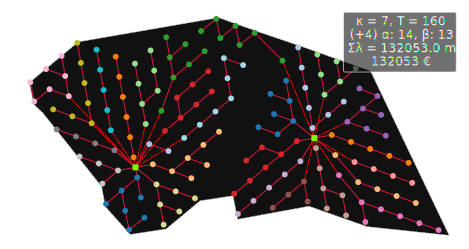

In [19]:
wfn.plot_selected_links()

The pyomo GurobiDirect class can work as context manager by passing the `manage_env=True` parameter to SolverFactory. Advantages of operating this way:
- the Gurobi license is released after the context's scope ends
- one can pass `options` that can only be set at the Gurobi environment creation (such as `threadlimit`)

In [20]:
solver_options=dict(
    num_workers = 8,
)

model_options = ModelOptions(
                        topology='branched',
                        feeder_limit='unlimited',
                        feeder_route='segmented',
                    )

router = MILP(solver_name='gurobi', time_limit=15, mip_gap=0.01, solver_options=solver_options,  verbose=True)
res = wfn.optimize(router=router)

ModuleNotFoundError: No module named 'gurobipy'


ApplicationError: No Python bindings available for <class 'pyomo.solvers.plugins.solvers.gurobi_direct.GurobiDirect'> solver plugin

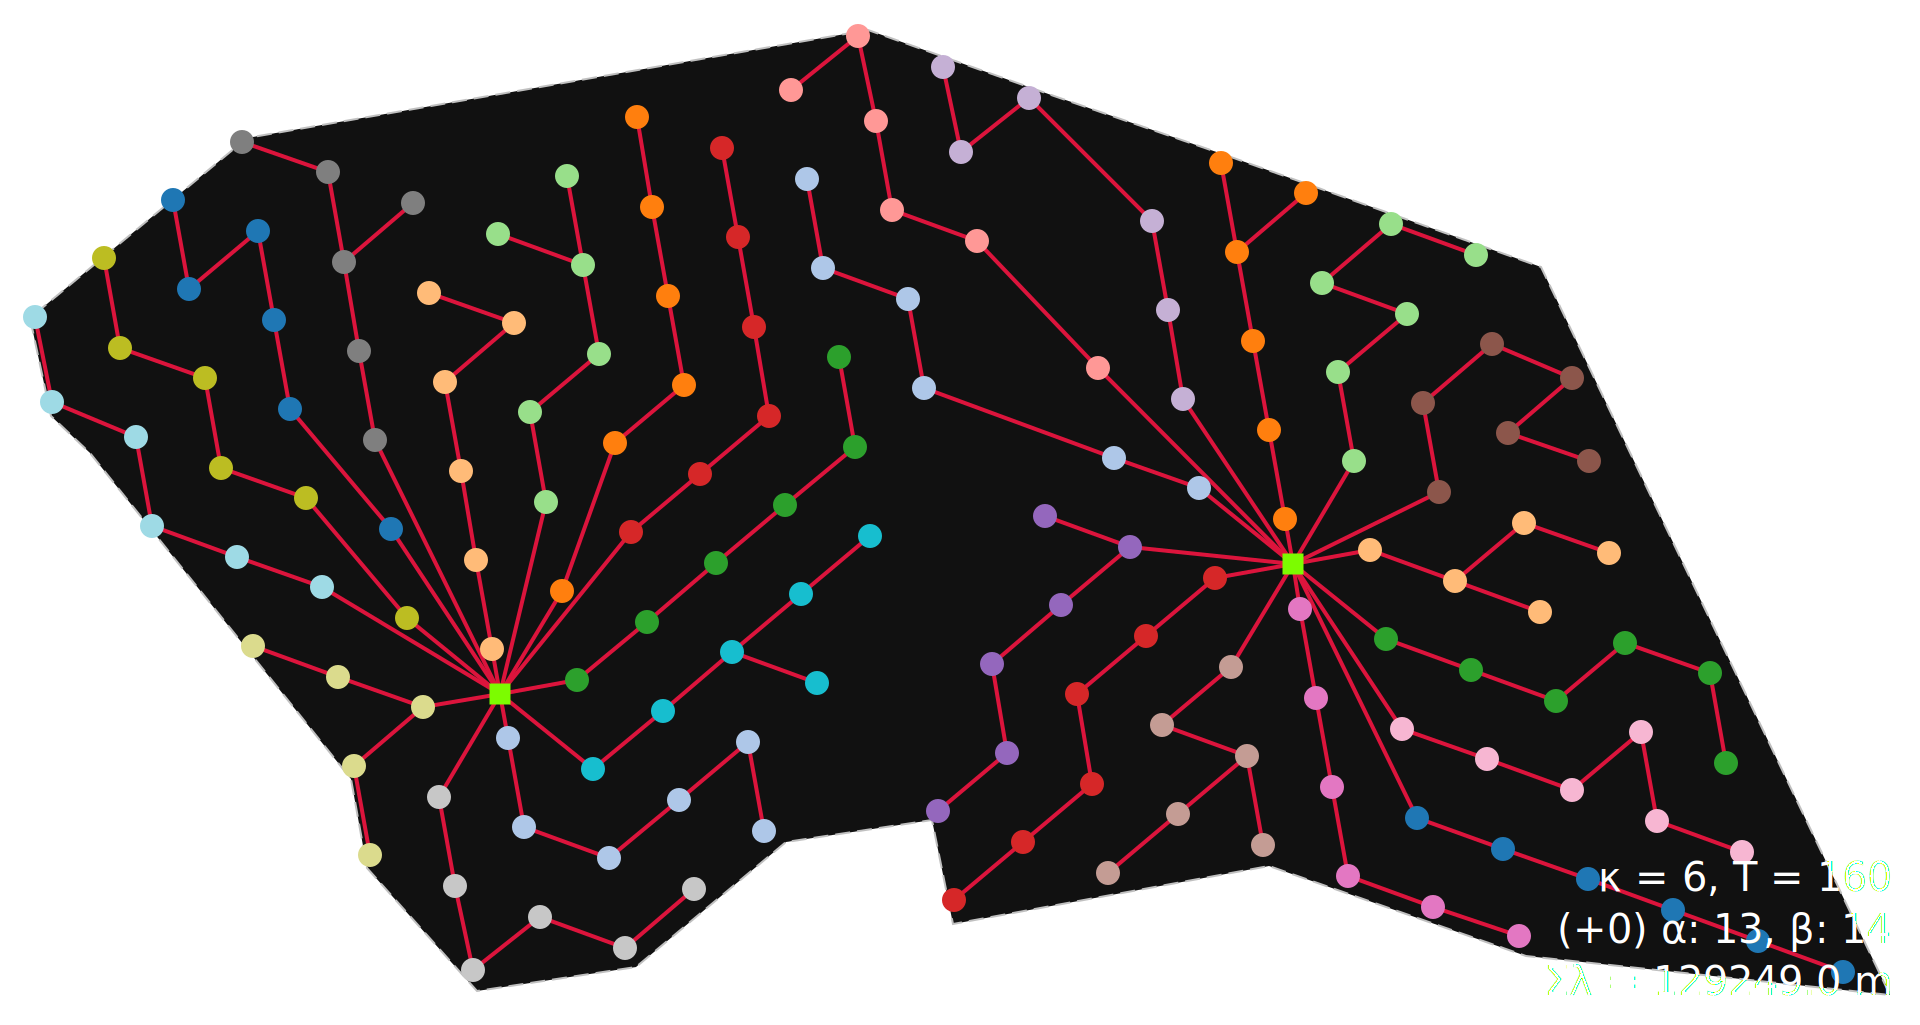

In [ ]:
wfn.plot_selected_links()

In [ ]:
wfn.plot()